In [ ]:
import math

import matplotlib.pyplot as plt
from scipy.stats import norm

In [ ]:
S0 = 100      # Initial price
K = 120       # Strike
T = 1         # Maturity (years)
sig = 0.2     # Volatility
r = 0.05      # Risk-free rate

# Black-Scholes

In [3]:
def black_scholes(S0, K, T, r, sig, option_type):
    assert option_type in ('call', 'put')
    d1 = (math.log(S0 / K) + (r + 0.5 * sig ** 2) * T) / (sig * math.sqrt(T))
    d2 = d1 - sig * math.sqrt(T)
    c = S0 * norm.cdf(d1) - K * math.exp(-r * T) * norm.cdf(d2)
    p = -S0 * norm.cdf(-d1) + K * math.exp(-r * T) * norm.cdf(-d2)
    return c if option_type == 'call' else p

# Binomial Tree

In [4]:
def binomial_tree(N, S0, K , T, r, sig, option_type='call'):
    assert option_type in ('call', 'put')
    dt = T / N
    u = math.exp(sig * math.sqrt(dt))
    d = math.exp(-sig * math.sqrt(dt))
    pu = (math.exp(r * dt) - d) / (u - d)
    value = 0 
    for Nu in range(N + 1):
        Nd = N - Nu
        node_prob = math.comb(N, Nu) * pu ** Nu * (1 - pu) ** Nd
        ST = S0 * u ** Nu * d ** Nd
        node_value = max(ST - K, 0) if option_type == 'call' else max(K - ST, 0)
        value += node_value * node_prob       
    return value * math.exp(-r * T)

# Comparison

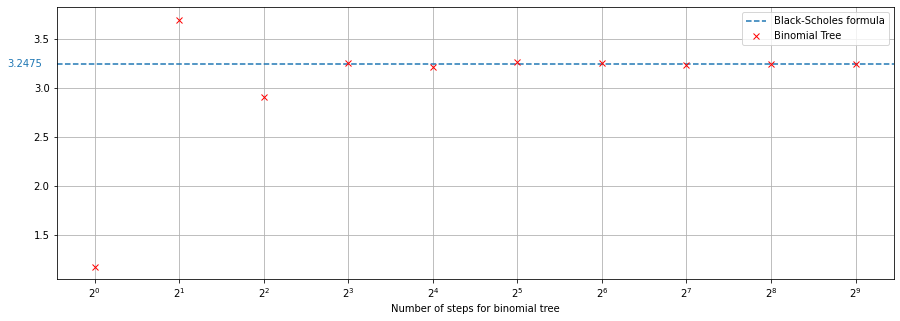

In [10]:
Ns = list(map(lambda i: 2 ** i, range(10)))
c = black_scholes(S0, K, T, r, sig, 'call')

fig = plt.figure(figsize=(15, 5))
ax = plt.gca()

ax.axhline(c, color='tab:blue', linestyle='--', label='Black-Scholes formula')
ax.text(0.65, c, f'{c:.4f}', color='tab:blue', ha="right", va="center")

ax.plot(Ns, list(map(lambda n: binomial_tree(n, S0, K, T, r, sig), Ns)), 'xr', label='Binomial Tree')
ax.set_xscale('log', base=2)
ax.set_xlabel('Number of steps for binomial tree')
ax.set_xticks(Ns)

ax.grid('on')
ax.legend()
plt.show()